<a href="https://colab.research.google.com/github/asrorKholmatov/ML-Engineer-Portfolio/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --quiet

In [2]:
import pandas as pd
import numpy as np
import opendatasets as od
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', None)

In [3]:
od.download('https://www.kaggle.com/datasets/blastchar/telco-customer-churn')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: asrorxolmatov
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


100%|██████████| 172k/172k [00:00<00:00, 212MB/s]

In [4]:
os.listdir('telco-customer-churn')

['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [5]:
df = pd.read_csv('/content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
df.shape

(7043, 21)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.isna().sum().sort_values(ascending=False).head(5)

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0


In [9]:
for col in df.columns:
  print(df[col].value_counts())

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    15

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df = df.drop(['customerID'], axis = 1)

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
df.dropna(inplace=True)

<Axes: >

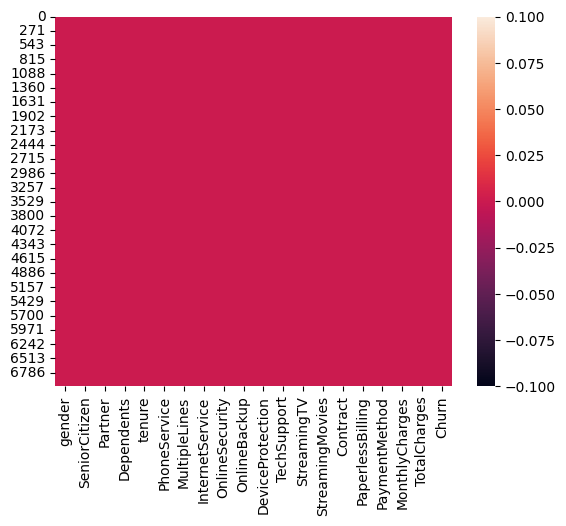

In [14]:
sns.heatmap(df.isnull())

<Axes: xlabel='Churn', ylabel='Count'>

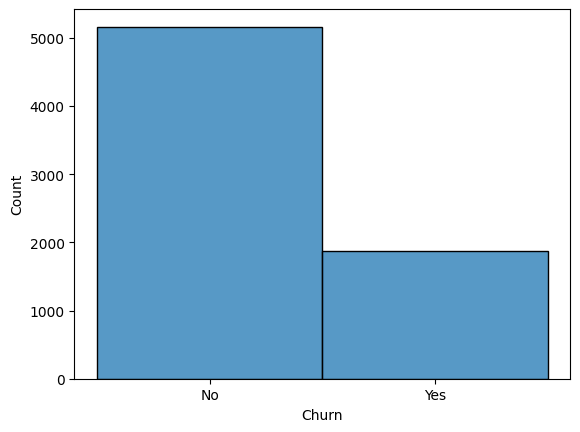

In [15]:
sns.histplot(df['Churn'])

In [16]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [17]:
inputs = df.drop(['Churn'], axis=1)
target = df['Churn']

In [18]:
numerical_col = inputs.select_dtypes(include='number').columns.tolist()
categorical_col = inputs.select_dtypes(include='object').columns.tolist()

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs[numerical_col] = scaler.fit_transform(inputs[numerical_col])

In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs[categorical_col])
encoded_col = list(encoder.get_feature_names_out(categorical_col))

inputs[encoded_col] = encoder.transform(inputs[categorical_col])

In [21]:
X = inputs[numerical_col + encoded_col]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

model_0 = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression())

In [24]:
model_0.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression', LogisticRegression())])

In [25]:
from sklearn.metrics import accuracy_score, f1_score

In [26]:
pred_train = model_0.predict(X_train)
pred_test = model_0.predict(X_test)

In [27]:
score = f1_score(y_train, pred_train)
score

0.6212952799121844

In [28]:
def predict_churn(model):
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)
  score_train = f1_score(y_train, pred_train)
  score_test = f1_score(y_test, pred_test)
  accuracy_train = accuracy_score(y_train, pred_train)
  accuracy_test = accuracy_score(y_test, pred_test)
  precision_train = precision_score(y_train, pred_train)
  precision_test = precision_score(y_test, pred_test)
  recall_train = recall_score(y_train, pred_train)
  recall_test = recall_score(y_test, pred_test)

  print(f'Train F1 Score: {score_train:.4f}')
  print('*'*50)
  print(f'Test F1 Score: {score_test:.4f}')
  print('*'*50)
  print(f'Train Accuracy: {accuracy_train:.4f}')
  print('*'*50)
  print(f'Test Accuracy: {accuracy_test:.4f}')
  print('*'*50)

  print(classification_report(y_test, pred_test))
  print('*'*50)

  cm = confusion_matrix(y_test, pred_test)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  y_prob = model.predict_proba(X_test)[:,1]
  auc = roc_auc_score(y_test, y_prob)
  fqr, tqr, thresholds = roc_curve(y_test, y_prob)

  plt.plot(fqr, tqr, label=f'AUC = {auc:.4f}')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    f1_score, accuracy_score, precision_score, recall_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

def predict_churn(model):
    # --------------------
    # Train va test predict
    # --------------------
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # --------------------
    # Metrics
    # --------------------
    score_train = f1_score(y_train, pred_train)
    score_test = f1_score(y_test, pred_test)

    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred_test)

    precision_train = precision_score(y_train, pred_train)
    precision_test = precision_score(y_test, pred_test)

    recall_train = recall_score(y_train, pred_train)
    recall_test = recall_score(y_test, pred_test)

    # --------------------
    # Print metrics
    # --------------------
    print("*" * 50)
    print(f"Train F1 Score   : {score_train:.4f}")
    print(f"Test  F1 Score   : {score_test:.4f}")
    print("*" * 50)
    print(f"Train Accuracy   : {accuracy_train:.4f}")
    print(f"Test  Accuracy   : {accuracy_test:.4f}")
    print("*" * 50)
    print(f"Train Precision  : {precision_train:.4f}")
    print(f"Test  Precision  : {precision_test:.4f}")
    print("*" * 50)
    print(f"Train Recall     : {recall_train:.4f}")
    print(f"Test  Recall     : {recall_test:.4f}")
    print("*" * 50)
    print("\nClassification Report (Test):\n")
    print(classification_report(y_test, pred_test))
    print("*" * 50)

    # --------------------
    # Confusion Matrix & ROC Curve (Subplots)
    # --------------------
    cm = confusion_matrix(y_test, pred_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    axes[0].set_title('Confusion Matrix')

    # ROC Curve
    axes[1].plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    axes[1].plot([0, 1], [0, 1], 'k--')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('ROC Curve')
    axes[1].legend()

    plt.tight_layout()
    plt.show()


**************************************************
Train F1 Score   : 0.6213
Test  F1 Score   : 0.5759
**************************************************
Train Accuracy   : 0.8160
Test  Accuracy   : 0.7896
**************************************************
Train Precision  : 0.6858
Test  Precision  : 0.6204
**************************************************
Train Recall     : 0.5679
Test  Recall     : 0.5374
**************************************************

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407

**************************************************


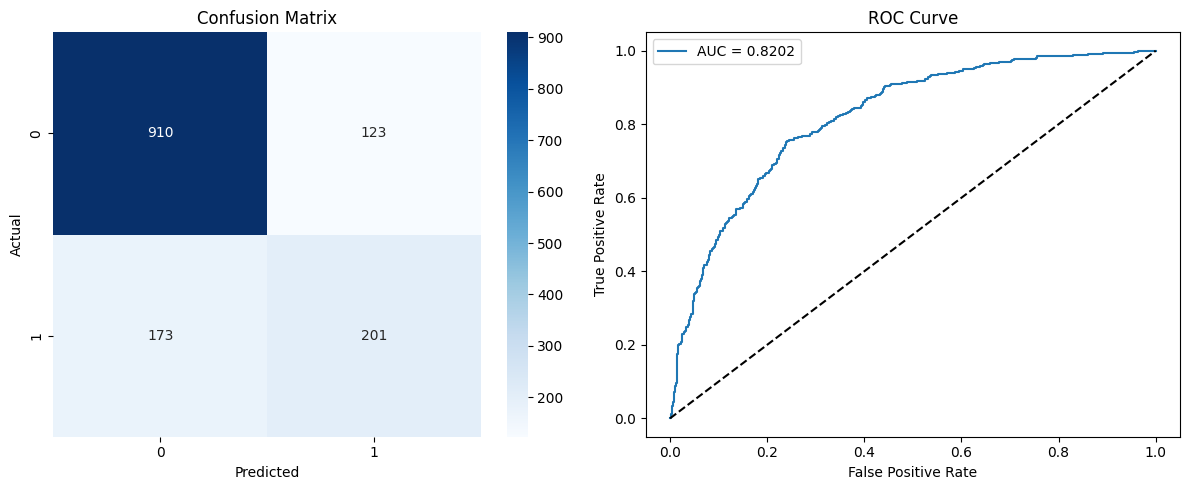

In [30]:
predict_churn(model_0)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p':[1, 2]
}

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

**************************************************
Train F1 Score   : 0.6443
Test  F1 Score   : 0.5392
**************************************************
Train Accuracy   : 0.8156
Test  Accuracy   : 0.7534
**************************************************
Train Precision  : 0.6613
Test  Precision  : 0.5356
**************************************************
Train Recall     : 0.6281
Test  Recall     : 0.5428
**************************************************

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1033
           1       0.54      0.54      0.54       374

    accuracy                           0.75      1407
   macro avg       0.68      0.69      0.69      1407
weighted avg       0.75      0.75      0.75      1407

**************************************************


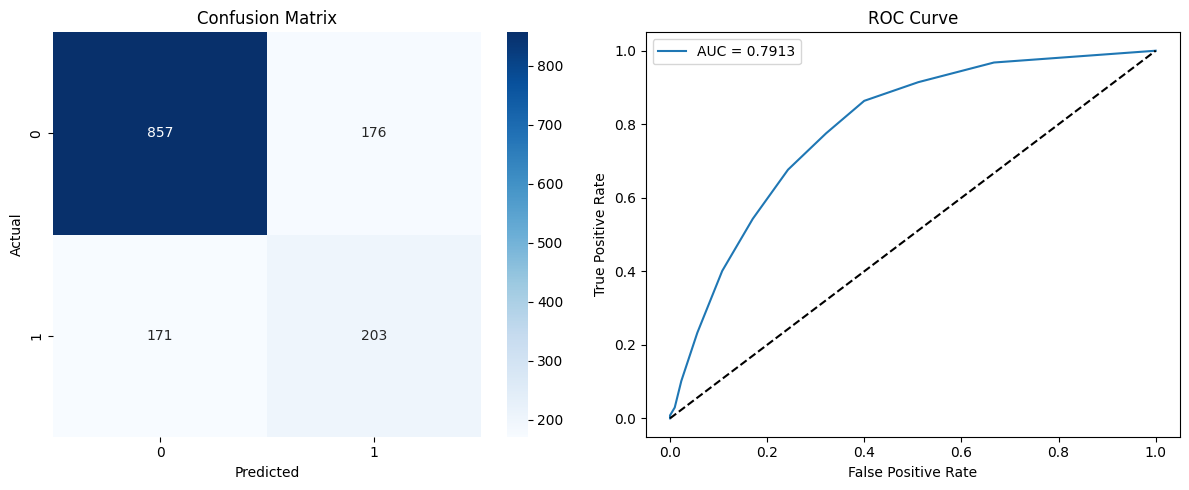

In [32]:
predict_churn(grid_search.best_estimator_)

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search2 = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search2.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=2)

**************************************************
Train F1 Score   : 0.7145
Test  F1 Score   : 0.5663
**************************************************
Train Accuracy   : 0.8601
Test  Accuracy   : 0.7953
**************************************************
Train Precision  : 0.7805
Test  Precision  : 0.6483
**************************************************
Train Recall     : 0.6589
Test  Recall     : 0.5027
**************************************************

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.80      0.79      1407

**************************************************


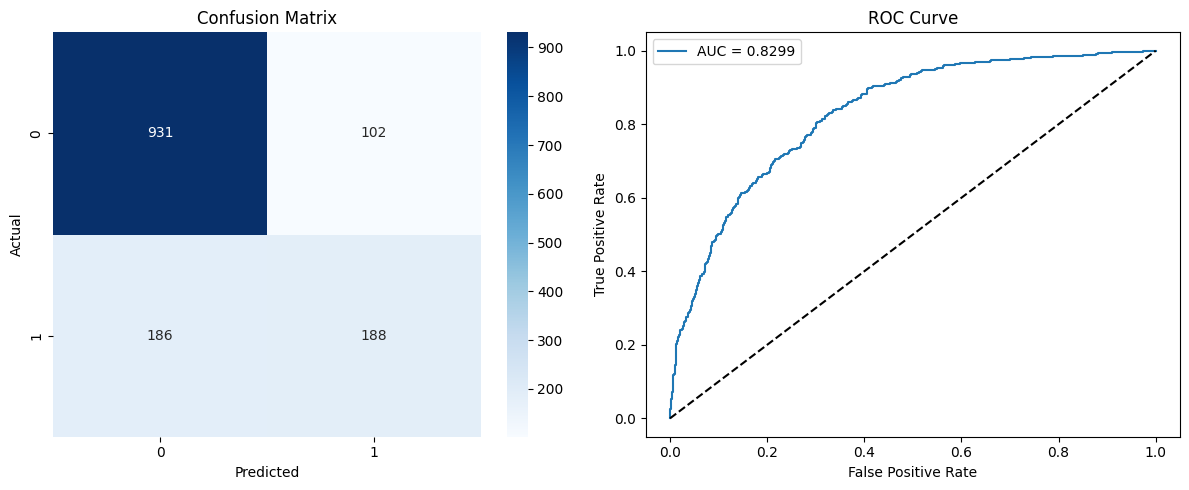

In [36]:
predict_churn(grid_search2.best_estimator_)

In [44]:
from xgboost import XGBClassifier


xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=No...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='roc_auc')

**************************************************
Train F1 Score   : 0.6330
Test  F1 Score   : 0.5616
**************************************************
Train Accuracy   : 0.8217
Test  Accuracy   : 0.7925
**************************************************
Train Precision  : 0.6987
Test  Precision  : 0.6404
**************************************************
Train Recall     : 0.5786
Test  Recall     : 0.5000
**************************************************

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

**************************************************


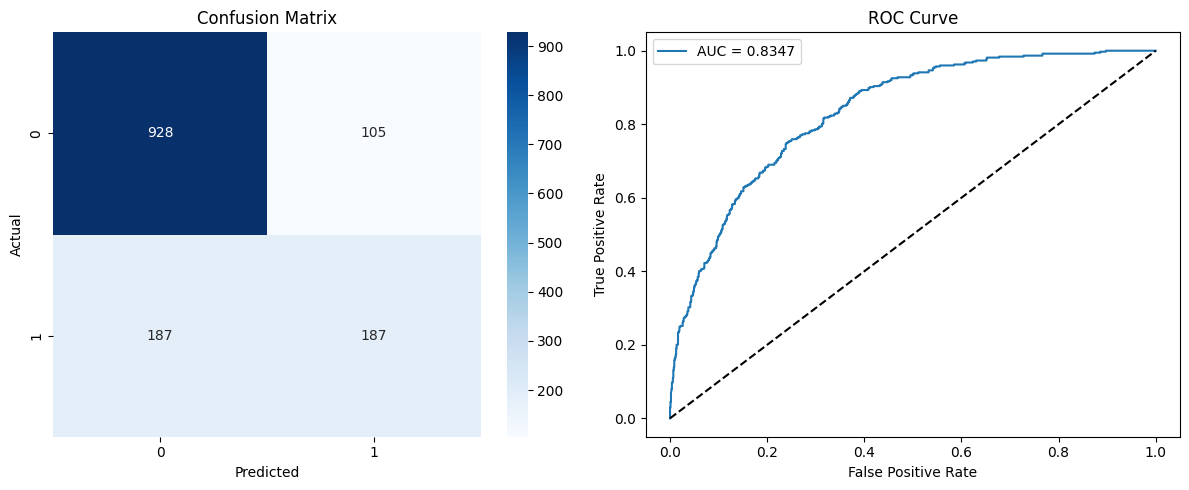

In [45]:
predict_churn(grid.best_estimator_)

In [53]:
from sklearn.svm import SVC
svc = SVC(probability=True, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbg', 'poly'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']
}

grid3 = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

grid3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbg', 'poly']})

**************************************************
Train F1 Score   : 0.5994
Test  F1 Score   : 0.5826
**************************************************
Train Accuracy   : 0.8025
Test  Accuracy   : 0.7953
**************************************************
Train Precision  : 0.6502
Test  Precision  : 0.6361
**************************************************
Train Recall     : 0.5559
Test  Recall     : 0.5374
**************************************************

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.54      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

**************************************************


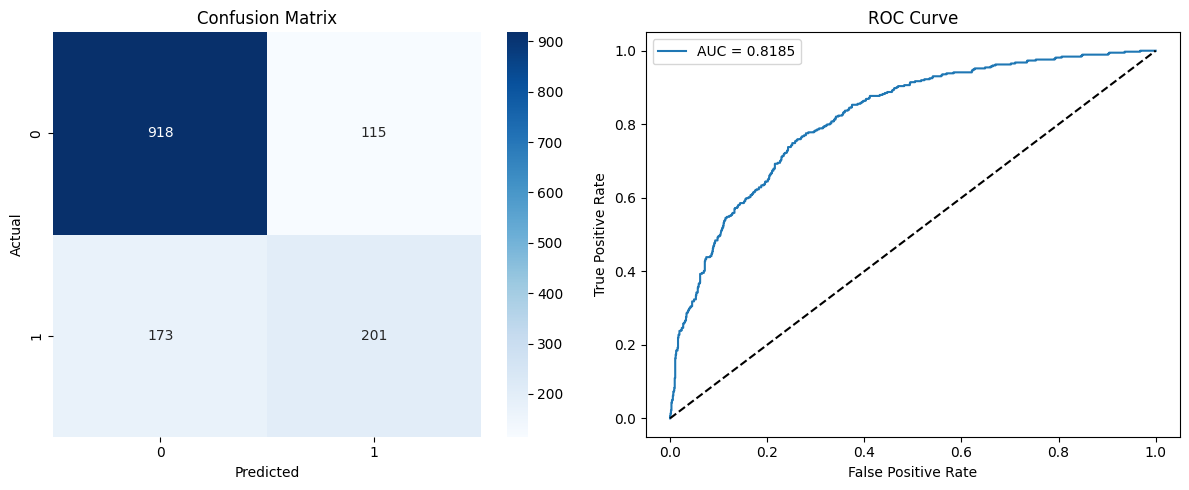

In [54]:
predict_churn(grid3.best_estimator_)